In [ ]:
#!pip install fbprophet

In [1]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [2]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [3]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

## Read Data: DJones

In [5]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [6]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

In [7]:
query = '''
select * from DJones
'''

data = pd.read_sql(query, conn)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,11502,11522,11306,11358,11358,1697500
1,2000-01-04,11350,11350,10986,10998,10998,1784200
2,2000-01-05,10989,11215,10939,11123,11123,2031900
3,2000-01-06,11113,11313,11098,11253,11253,1765500
4,2000-01-07,11247,11528,11240,11523,11523,1849000


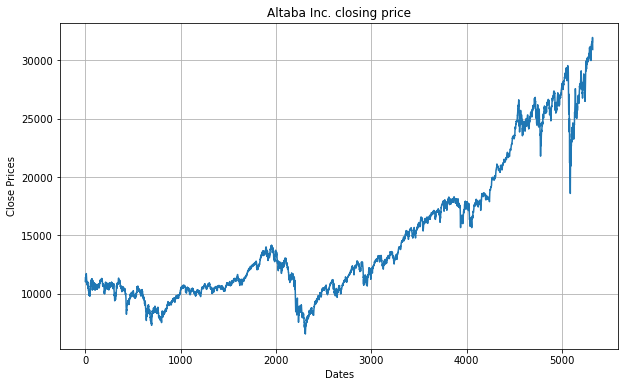

In [8]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

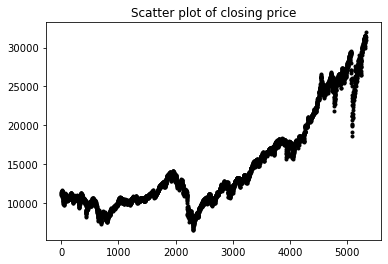

In [9]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

## build the predictive model

In [10]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2000-01-03,11358
1,2000-01-04,10998
2,2000-01-05,11123
3,2000-01-06,11253
4,2000-01-07,11523


In [12]:
from fbprophet import Prophet

In [13]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


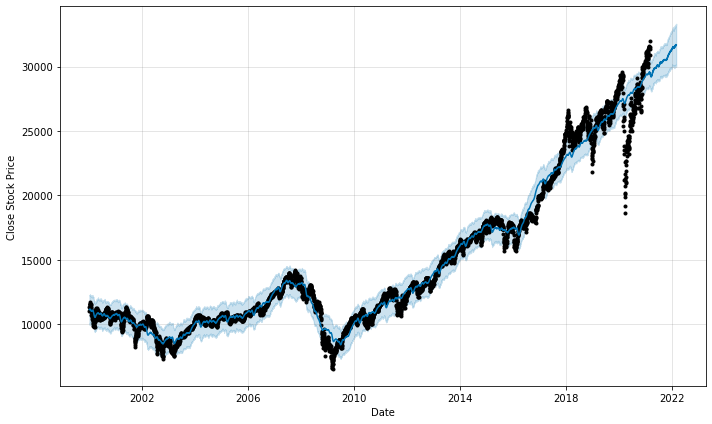

In [14]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

figure = m.plot(prediction)
#plt.title("Prediction of the NASDAQ Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
figure.savefig(f'../plots/djones_figure.png')

In [ ]:
m.plot_components(prediction)
plt.show()